In [1]:
import scipy
import numpy as np
from math import pi
import librosa
from matplotlib import pylab as pl
from energy_threshold_detector import EnergyThresholdDetector

# Open a wav file with librosa

In [2]:
pfile_full = "./audiofiles/poeme_full.wav"
pfile_damaged = "./audiofiles/poeme_damaged.wav" 

y_full, sr = librosa.load(pfile_full, sr=16000)
y_damaged, _ = librosa.load(pfile_damaged, sr=16000)

In [3]:
# extract 10s
y_full = y_full[sr*2:sr*12]
y_damaged = y_damaged[sr*2:sr*12]

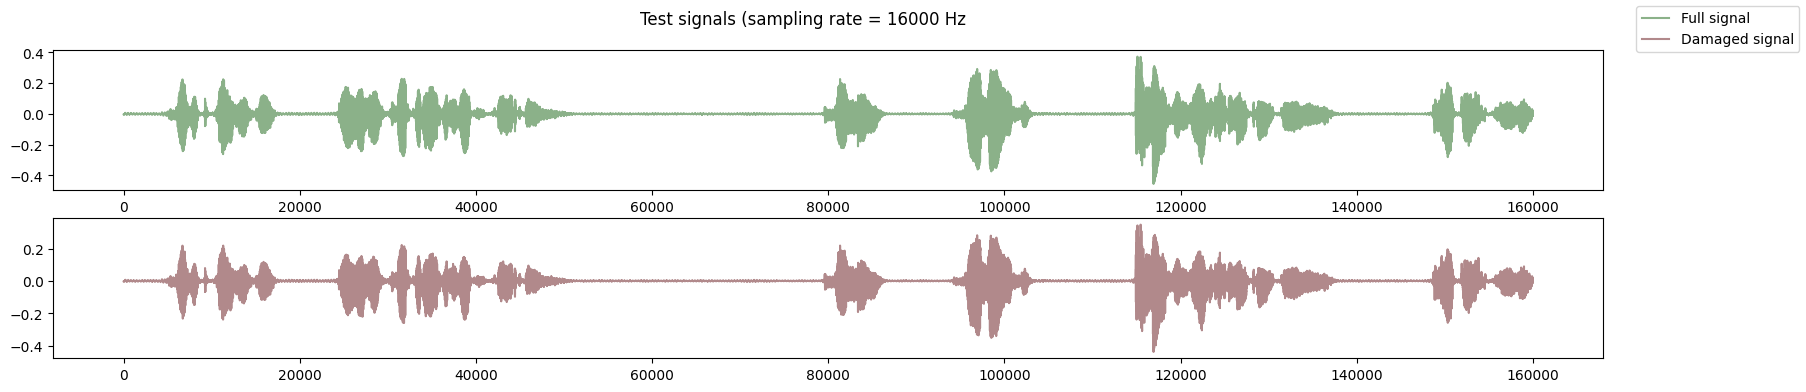

In [4]:
colorset = ["#8bb189", "#b1898b"]
labels = ["Full signal", "Damaged signal"]

fig, ax = pl.subplots(2, figsize=(20, 4))
ax[0].plot(y_full, color=colorset[0], label=labels[0])
ax[1].plot(y_damaged, color=colorset[1], label=labels[1])
fig.suptitle(f"Test signals (sampling rate = {sr} Hz")
fig.legend()
pl.show()

# Load the EnergyThresholdDetector

In [5]:
etd = EnergyThresholdDetector(
    sr=sr, 
    thresholds=[0.95, 0.97, 0.99]
)

# Run and plot

In [6]:
frequencies = [etd(y_full), etd(y_damaged)]

In [7]:
n = len(y_full)
duration = n / etd.sr

fft_full = scipy.fft.fft(y_full)
fft_damaged = scipy.fft.fft(y_damaged)

spectrum_full = abs(fft_full)[:(n // 2)]
spectrum_damaged = abs(fft_damaged)[:(n // 2)]

Text(0.5, 0.98, 'Spectrum and maximum energy thresholds')

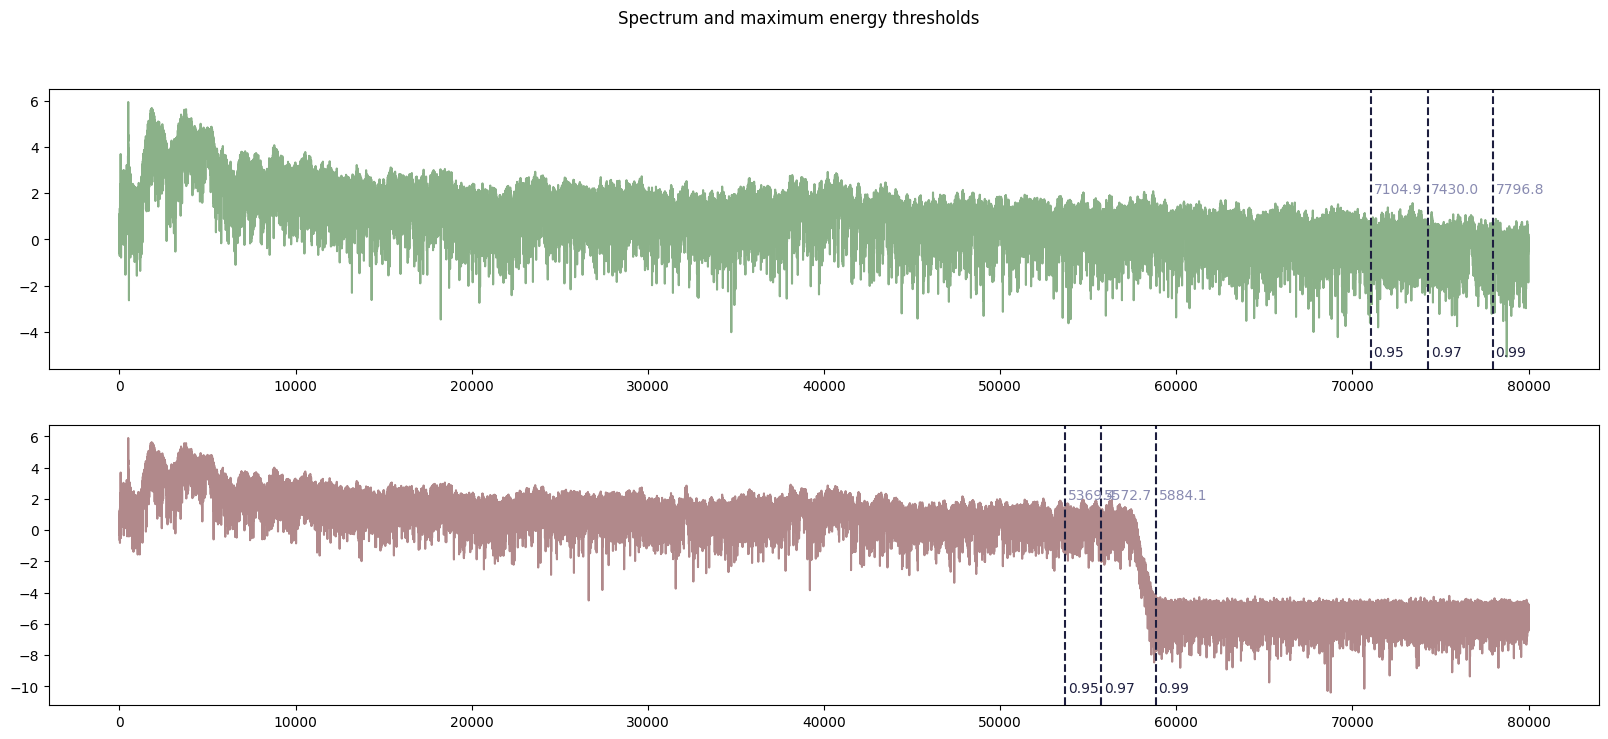

In [8]:
fig, ax = pl.subplots(2, figsize=(20, 8))

for (axes, spectrum, c, l, f) in zip(ax, [spectrum_full, spectrum_damaged], colorset, labels, frequencies):
    
    axes.plot(np.log(spectrum), color=c, label=l)    
    for (f, t) in zip(f, etd.thresholds):
        axes.axvline(x=f * duration, linestyle="--", color="#1d1e3f")
        axes.text(f * duration + 150, 2, f"{f}", color="#898bb1")
        axes.text(f * duration + 150, min(np.log(spectrum)), f"{t}", color="#1d1e3f")

fig.suptitle("Spectrum and maximum energy thresholds")